# Lab 2 - Swiss dataset


1. Relationships

2. Load in the data “swiss.csv” from moodle and look at the readme file for information on dataset.

In [14]:
import pandas as pd

swiss = pd.read_csv('swiss.csv')

swiss.head()

,Name,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


3. Investigate if any the numerical variables seem to have a linear relationship by producing scatterplots.

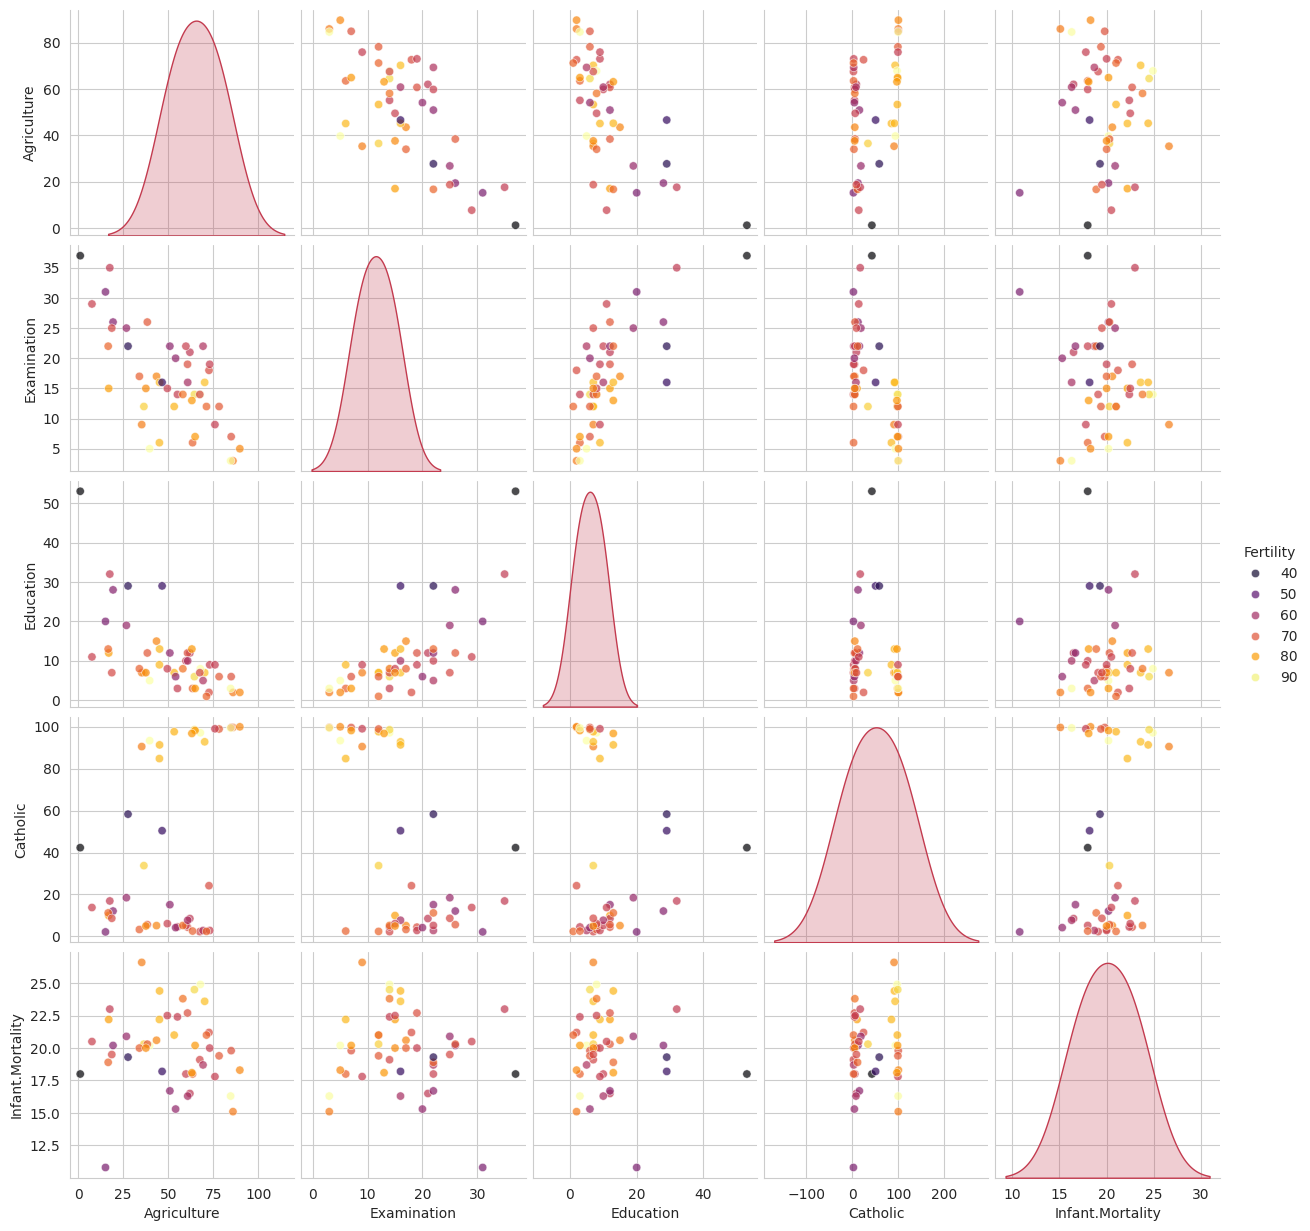

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style first
sns.set_style("whitegrid")

# Create pairplot with custom colors
pairplot = sns.pairplot(swiss[['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']], 
                        hue='Fertility', 
                        palette='inferno',
                        plot_kws={'alpha': 0.7})  # Add transparency

plt.show()

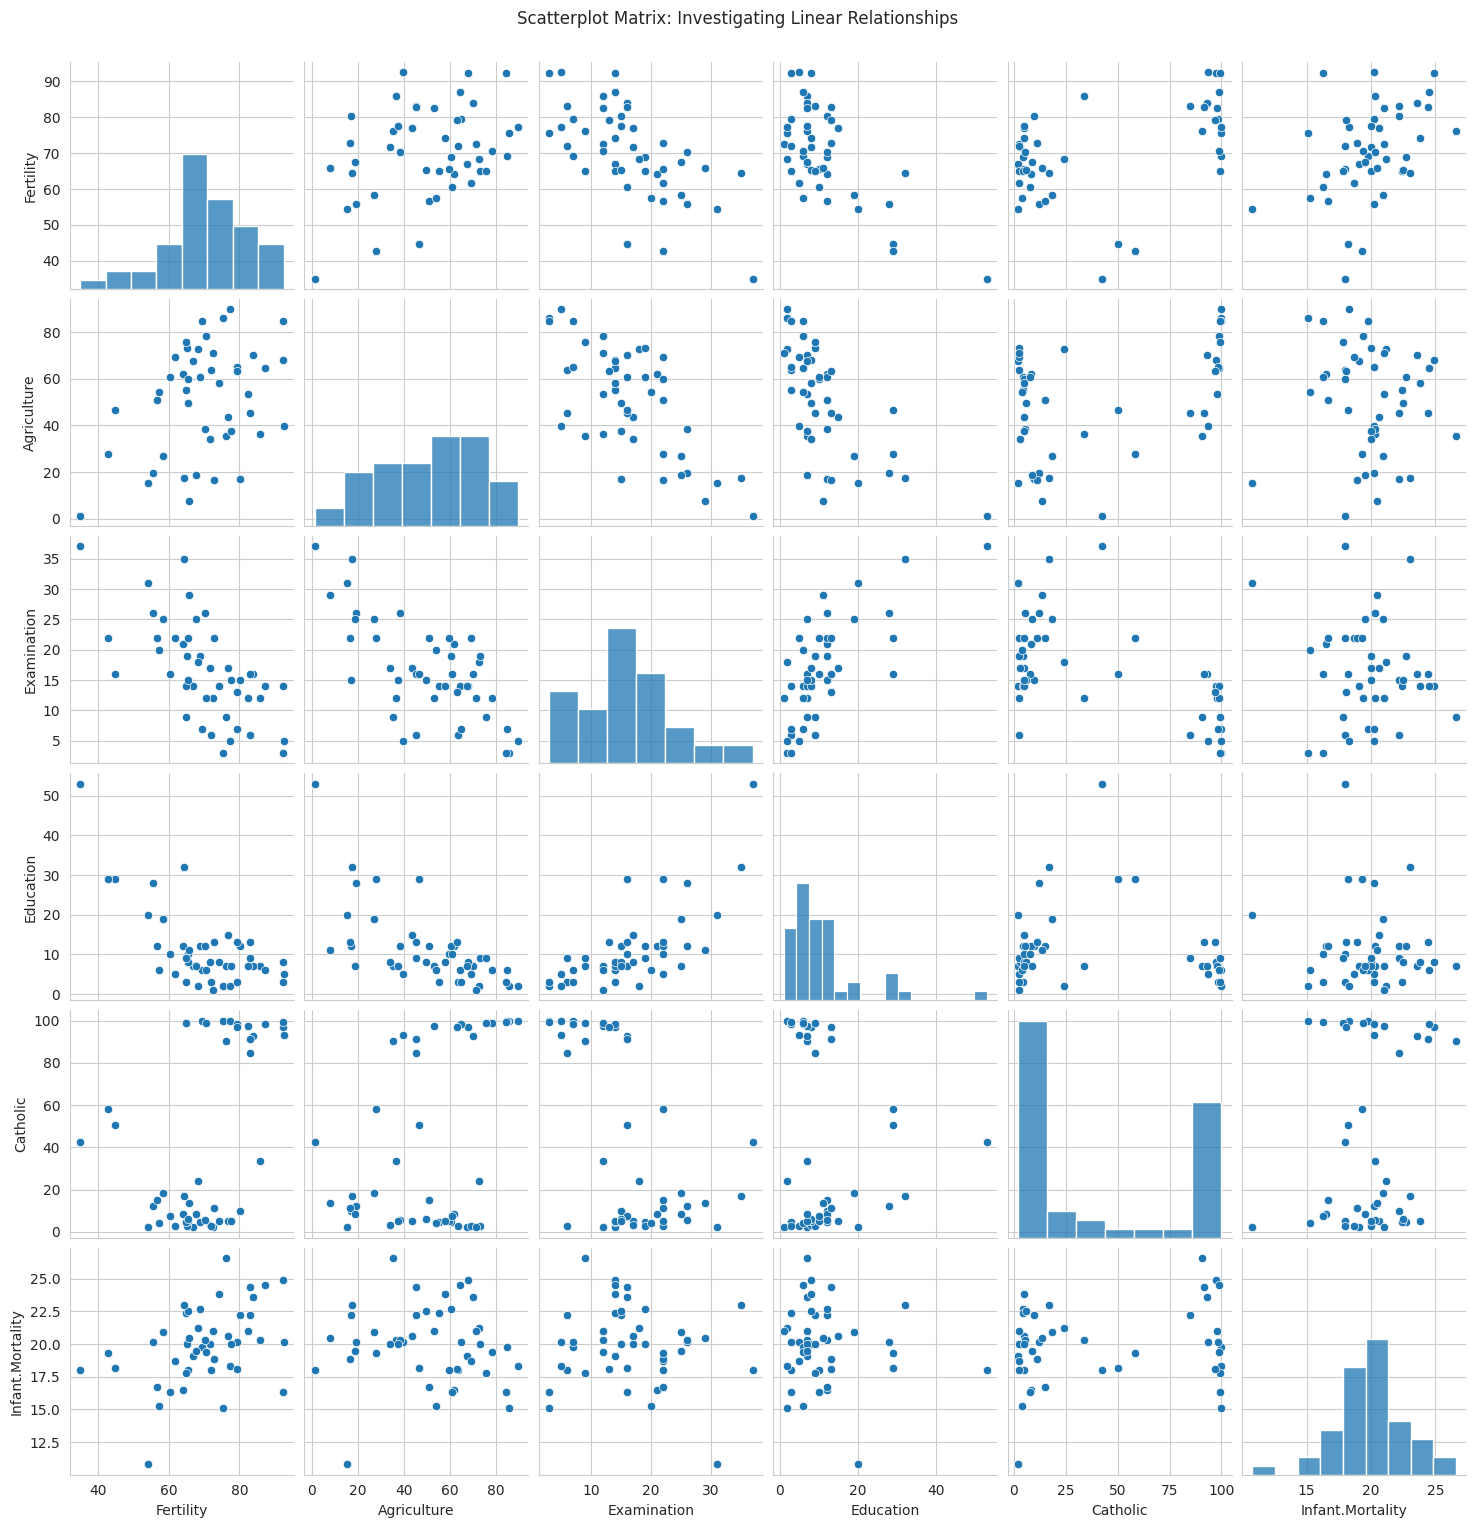

In [ ]:
    # Create pairplot to see all relationships
    sns.pairplot(swiss[['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']])
    plt.suptitle("Scatterplot Matrix: Investigating Linear Relationships", y=1.02)
    plt.show()

4. With those that do show signs of a linear relationship, calculate their Pearson correlations and interpret the results.


In [22]:
# Calculate Pearson correlation matrix
corr_matrix = swiss[['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']].corr(method='pearson')

print("PEARSON CORRELATION MATRIX:")
print(corr_matrix.round(3))

PEARSON CORRELATION MATRIX:
                  Fertility  Agriculture  Examination  Education  Catholic  \
Fertility             1.000        0.353       -0.646     -0.664     0.464   
Agriculture           0.353        1.000       -0.687     -0.640     0.401   
Examination          -0.646       -0.687        1.000      0.698    -0.573   
Education            -0.664       -0.640        0.698      1.000    -0.154   
Catholic              0.464        0.401       -0.573     -0.154     1.000   
Infant.Mortality      0.417       -0.061       -0.114     -0.099     0.175   

                  Infant.Mortality  
Fertility                    0.417  
Agriculture                 -0.061  
Examination                 -0.114  
Education                   -0.099  
Catholic                     0.175  
Infant.Mortality             1.000  


5. With those that do show signs of non-linear relationship, calculate appropriate correlations and interpret the results.

In [28]:
# SIMPLE CODE: Check non-linear relationships
from scipy.stats import spearmanr

# Check Catholic vs Education
pearson1 = swiss['Catholic'].corr(swiss['Education'])
spearman1, _ = spearmanr(swiss['Catholic'], swiss['Education'])


print ("Linear = Pearson, Non-linear = Spearman")

print("Catholic vs Education:")
print(f"Linear: {pearson1:.3f}")
print(f"Non-linear: {spearman1:.3f}")
if abs(spearman1 - pearson1) > 0.15:
    print("→ NON-LINEAR")
print()

# Check Catholic vs Infant.Mortality  
pearson2 = swiss['Catholic'].corr(swiss['Infant.Mortality'])
spearman2, _ = spearmanr(swiss['Catholic'], swiss['Infant.Mortality'])

print("Catholic vs Infant.Mortality:")
print(f"Linear: {pearson2:.3f}")
print(f"Non-linear: {spearman2:.3f}")
if abs(spearman2 - pearson2) > 0.15:
    print("→ NON-LINEAR")
print()

# Check Agriculture vs Infant.Mortality
pearson3 = swiss['Agriculture'].corr(swiss['Infant.Mortality'])
spearman3, _ = spearmanr(swiss['Agriculture'], swiss['Infant.Mortality'])

print("Agriculture vs Infant.Mortality:")
print(f"Linear: {pearson3:.3f}") 
print(f"Non-linear: {spearman3:.3f}")
if abs(spearman3 - pearson3) > 0.15:
    print("→ NON-LINEAR")

Linear = Pearson, Non-linear = Spearman
Catholic vs Education:
Linear: -0.154
Non-linear: -0.144

Catholic vs Infant.Mortality:
Linear: 0.175
Non-linear: 0.066

Agriculture vs Infant.Mortality:
Linear: -0.061
Non-linear: -0.152


6. What is the response variable and the research question of interest?
